In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR

In [2]:
df=pd.read_csv("c://j-works22/works/data/prac_many.csv")
y=df['y']
x=df.values[:, 2:10]
x=StandardScaler(with_mean=True, with_std=True).fit_transform(x)

In [3]:
# eigenvalue and eigenvectors from XX' matrix
u=np.matmul(x.T, x)   
evals, evecs = np.linalg.eig(u)

# Eigenvalues and eigenvectors as descending order
sort=np.argsort(-1*evals)
vals=evals[sort]
vecs=evecs[:, sort]
n=len(vals)

# the largest eigenvalu and eigenvector
vals0=vals[0]
vecs0=vecs[:,0]

# the largest factor
gamma0=np.sqrt(n)*vecs0 
f0=np.matmul(x, gamma0)/n

# rescaled factor
# factor0=np.array(f0)
f0=f0.reshape(-1,1)
f0=StandardScaler(with_mean=True, with_std=True).fit_transform(f0)

In [4]:
# z= T  by 2 
z=np.column_stack((f0, y))
result=VAR(z).fit(maxlags=10, ic='bic')
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 30, May, 2022
Time:                     13:28:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -13.1591
Nobs:                     215.000    HQIC:                  -13.2151
Log likelihood:           820.568    FPE:                1.75485e-06
AIC:                     -13.2531    Det(Omega_mle):     1.70688e-06
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.032747         0.044446           -0.737           0.461
L1.y1         0.830719         0.048303           17.198           0.000
L1.y2        95.967432        18.381113            5.221           0.000

Results for equation 

In [5]:
# Granger-Causality
# Null hypothesis: Factor does not Granger-cause y variable
granger=result.test_causality('y2', ['y1'], kind='f')
granger.summary()

Test statistic,Critical value,p-value,df
0.06831,3.863,0.794,"(1, 424)"


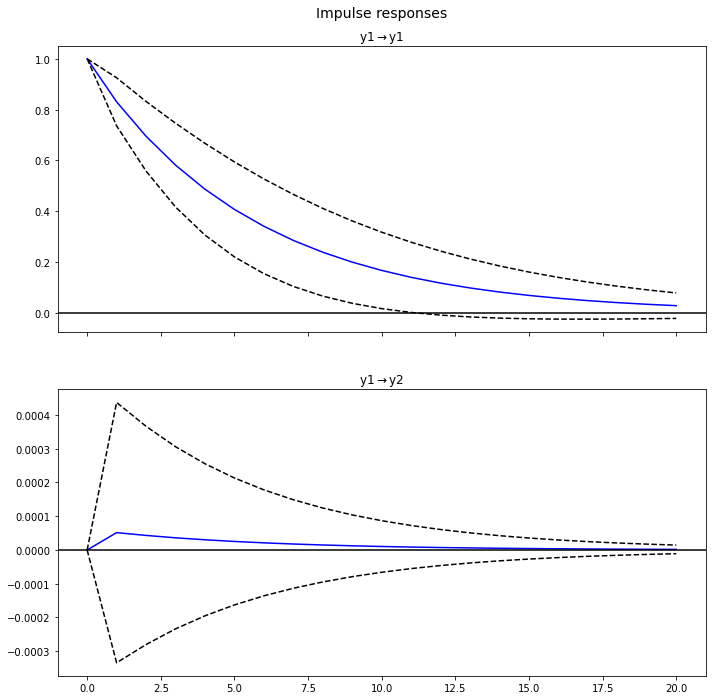

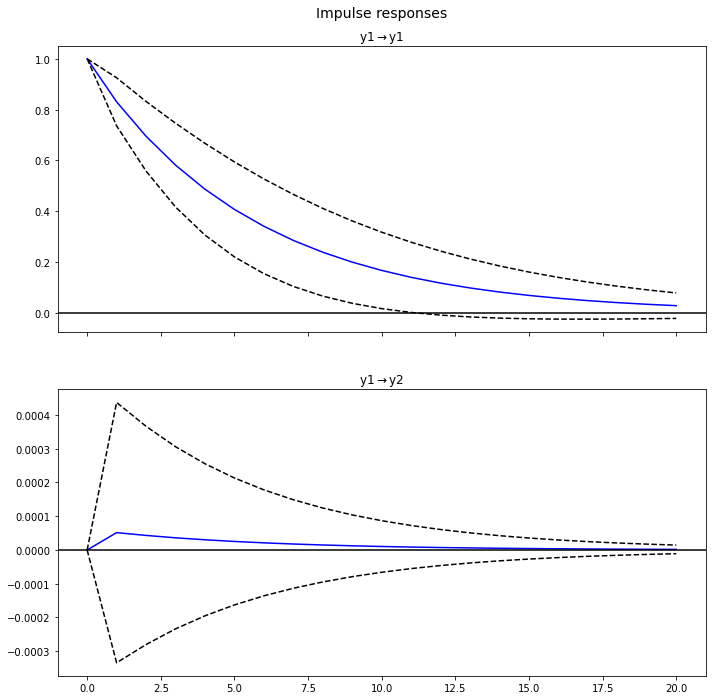

In [11]:
# impulse response functions: shock =factor, response= other variable

irf=result.irf(20)
irf.plot(orth=False, impulse='y1')

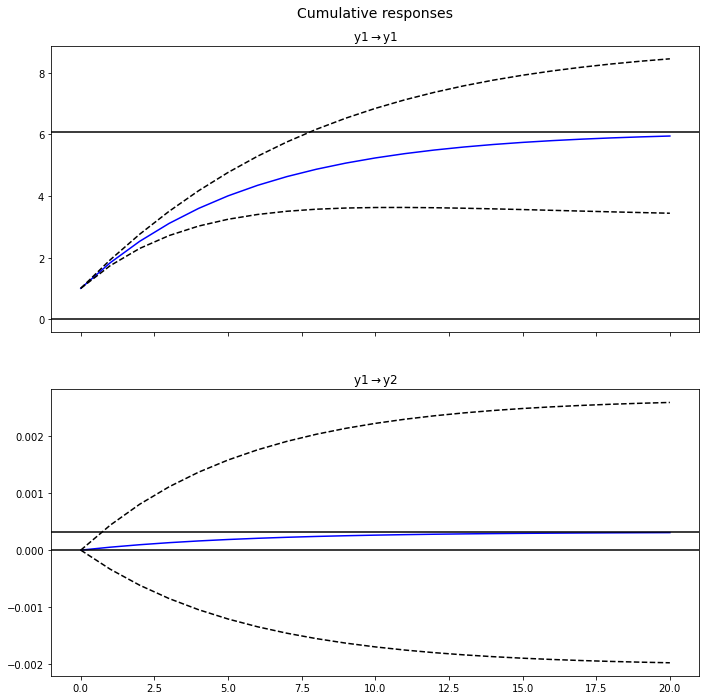

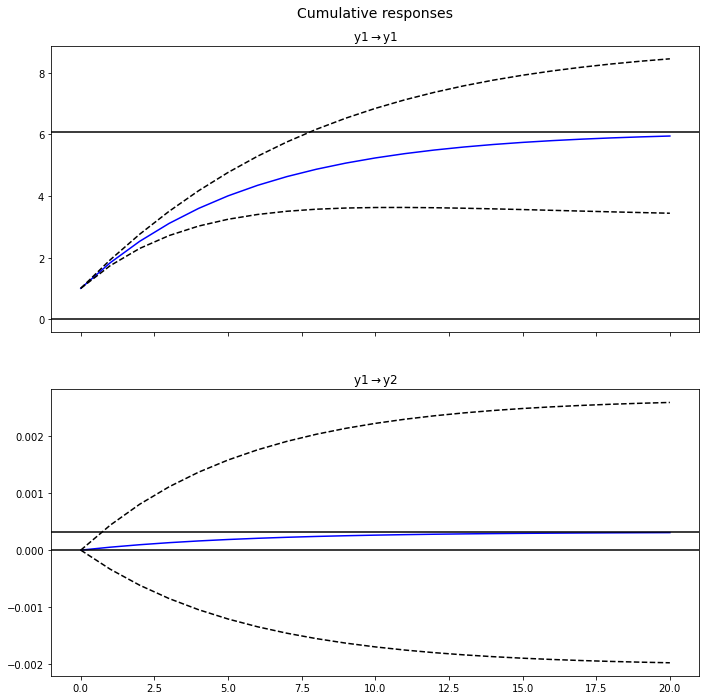

In [13]:
# cumuative effects
irf.plot_cum_effects(orth=False, impulse='y1')